# BCPNN-perfect oddities
This notebook is to write some beahvior who clearly does not have a big thematical arch but nevertheless is useful for:
* Thinking about the properties of the BCPNN.
* Explain phenomena that may work the BCPNN in a way that we do not understand.

In [2]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history
from connectivity_functions import artificial_connectivity_matrix

## Tau_z reversal

In [16]:
g_w_ampa = 2.0
g_w = 0.0 
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.100
tau_z_post_ampa = 0.100
tau_p  = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

markersize = 32
linewidth = 10

epochs 0
epochs 1
epochs 2


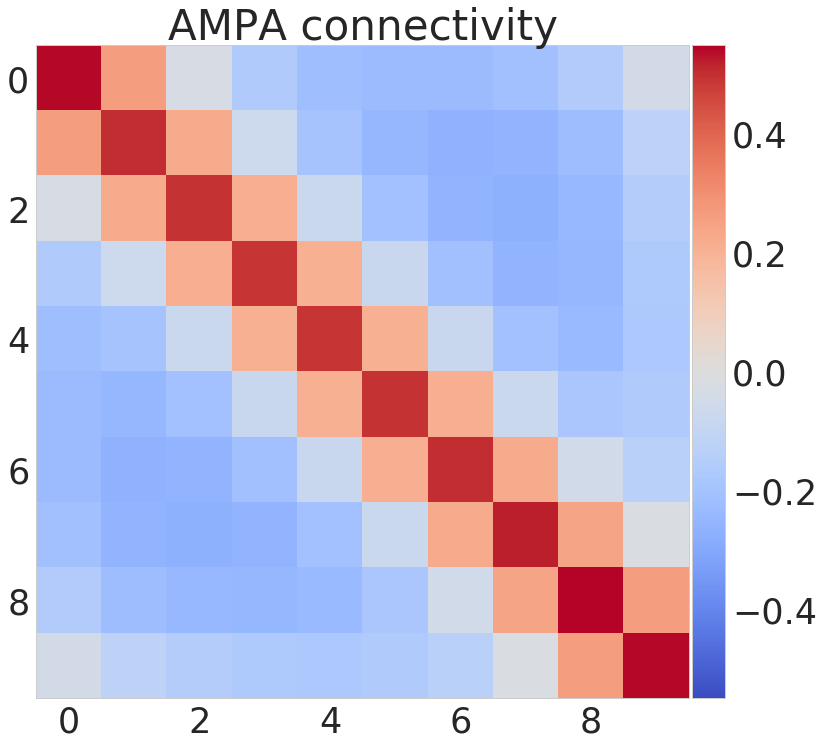

In [17]:
# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G, 
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa,
                  tau_p=tau_p, z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

plot_weight_matrix(manager.nn, ampa=True)

success 100.0


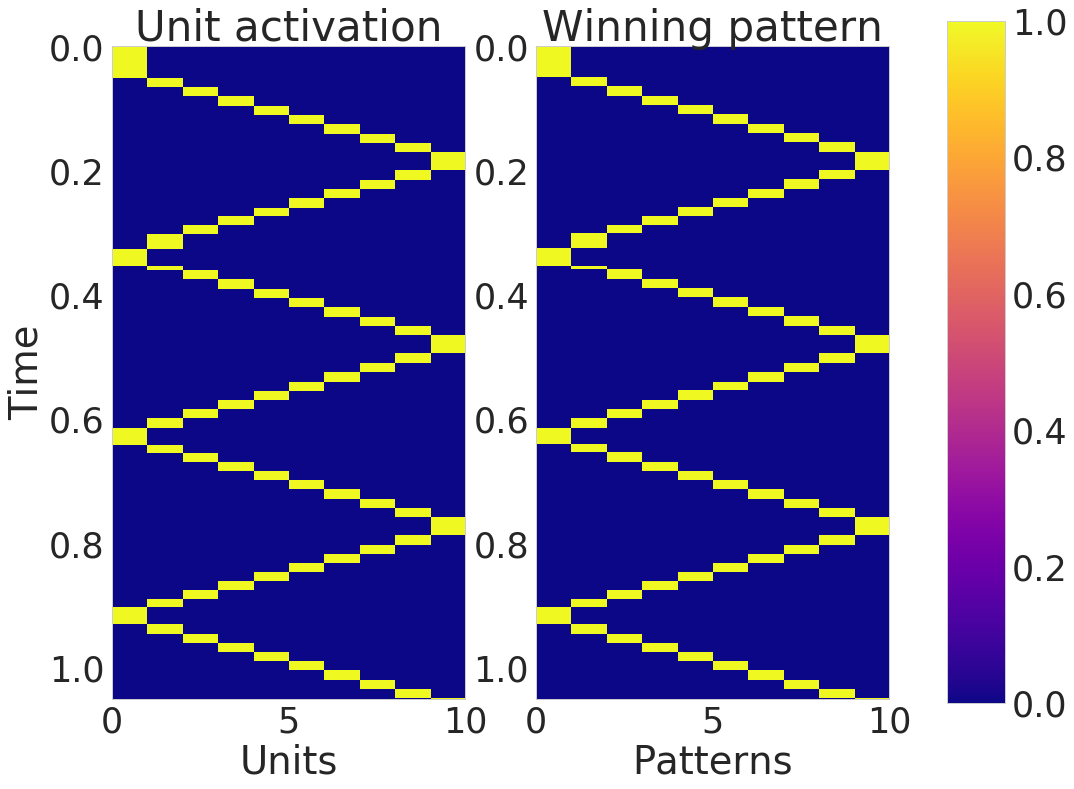

In [18]:
T_recall = 1.0
T_cue = 0.050
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

We can appreciate a reversal of the order of the sequence at the end. We could close this with a loop but it is important to understand why. In this case, I think in this case what is causing the phenomena is the fact that due to the symmetry of tau_z_pre_ampa and tau_z_post_ampa the connectivity matrix is symmetric. This causes a backward-feedback current that is usually strong enough if were not for the adaptation, when this current as to compete with the fowrward current the latter wins because it has no adaptation but when there is no feed-forward current anymore (the case at the end of the sequence) the backward current wins and the sequence is reversed. 

In order to test this hypothesis we have distinct time constants for both the feed-forward and the back-ward current

In [30]:
g_w_ampa = 2.0
g_w = 0.0 
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.100
tau_z_post_ampa = 0.005
tau_p  = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

epochs 0
epochs 1
epochs 2


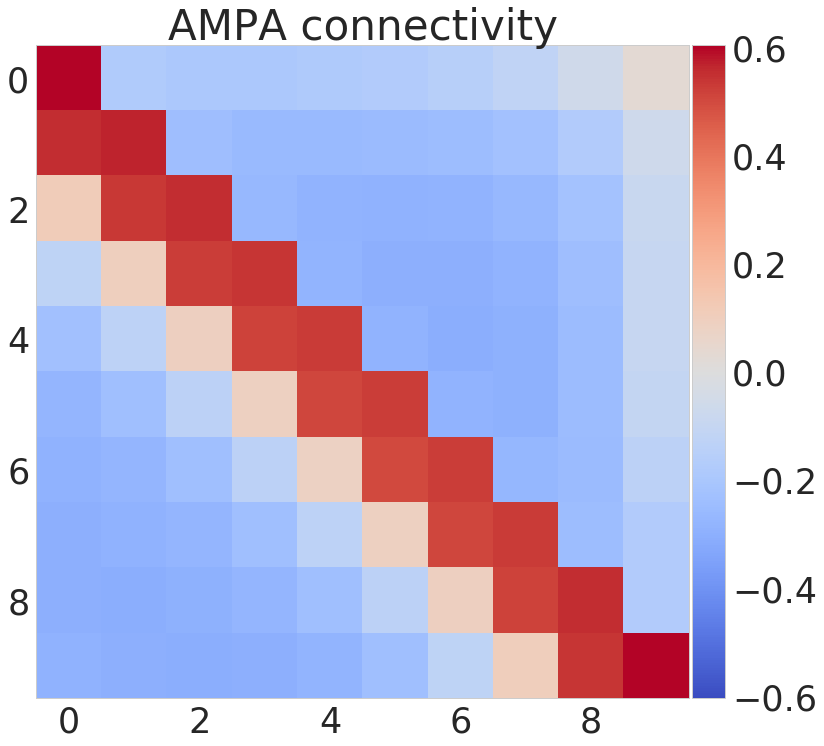

In [27]:
# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G, 
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa,
                  tau_p=tau_p, z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)


plot_weight_matrix(manager.nn, ampa=True)

success 0.0


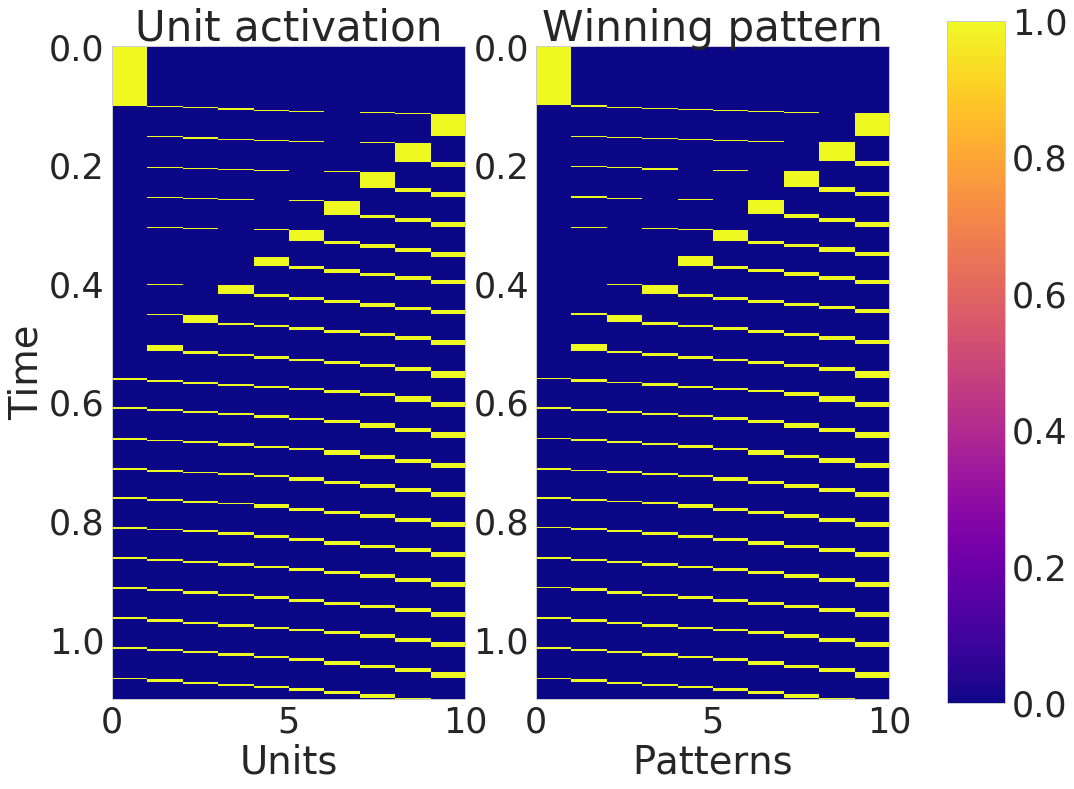

In [28]:
T_recall = 1.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

This does NOT converge. Why? the reason is from the weight differential in the matrix. We see this has become smaller between the w_self and w_next. Why this happened? because the z_pre filter does not have a ot in common with the z_post filter for the same unit. **The effect of very different filter is that the self-weight is not as big**. 

So if we were to made the training time to allow the self-excitatory filters to have more in common we could solve this problem.

epochs 0
epochs 1
epochs 2


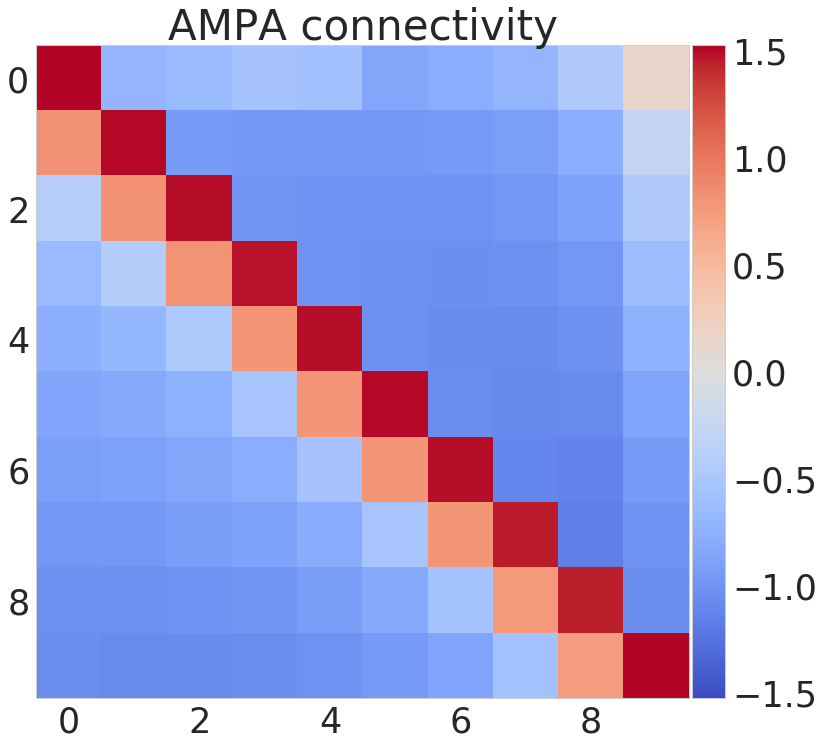

In [29]:
g_w_ampa = 2.0
g_w = 0.0 
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.100
tau_z_post_ampa = 0.005
tau_p  = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']
    
# Protocol
training_time = 0.300
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G, 
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa,
                  tau_p=tau_p, z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)


plot_weight_matrix(manager.nn, ampa=True)

success 100.0


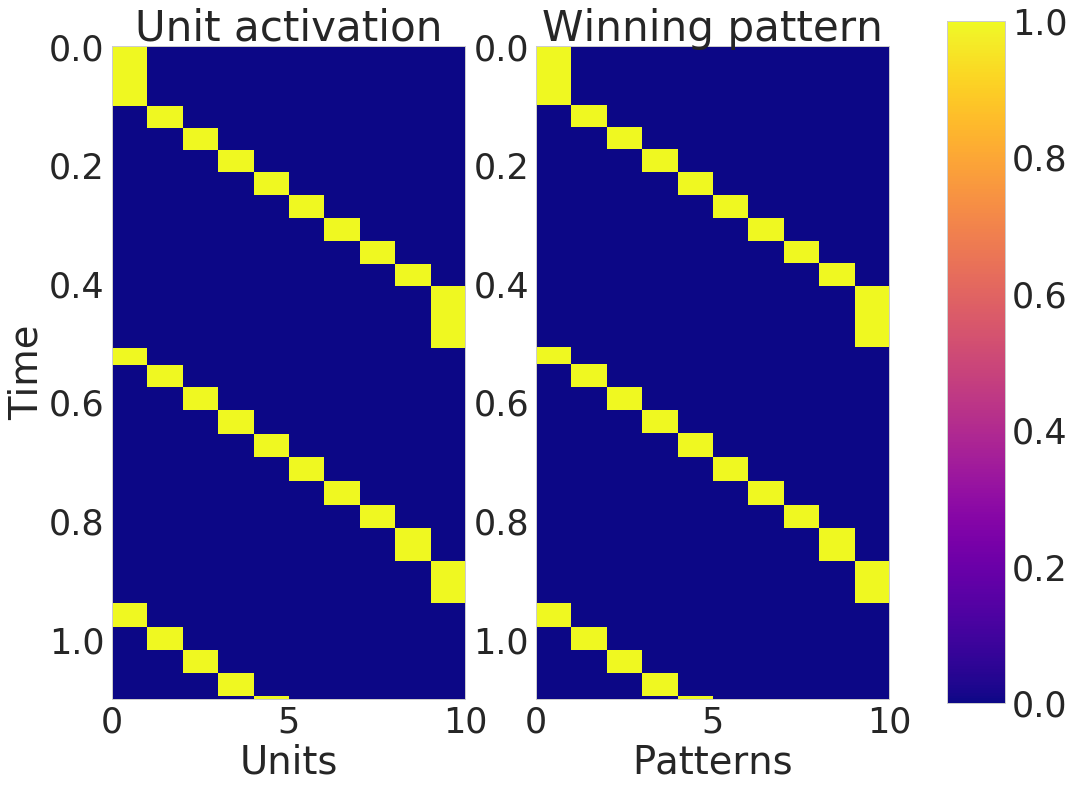

In [31]:
T_recall = 1.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)